<a href="https://colab.research.google.com/github/cutiepie25/AI/blob/main/8_Analisis_sentimiento_despliegue_word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis de Sentimientos - Despliegue Word2Vec**


*   Se carga el modelo
*   Se cargan los datos futuros
*   Se preparan los datos futuros
*   Se aplica el modelo


In [ ]:
#Cargamos librerías principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Instalación de paquetes para tratamiento de texto
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud

nltk.download('popular')
stopwords.words('spanish')
stemmer = SnowballStemmer('spanish')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [ ]:
#Cargar el modelo
import pickle
filename = 'modelo_text_word2vec.pkl'
model, word2vec_model, labelencoder= pickle.load(open(filename, 'rb'))

In [ ]:
#Cargamos los datos futuros
data = pd.read_excel("sentimientos_test.xlsx", sheet_name=0)
data.head()

,comentario,sentimiento
0,el profesor 3 tiene un buen material de clase,NaN
1,no le entiendo no explica nada,NaN
2,muy regular,NaN


In [ ]:
#Limpieza
def tokenizar(texto):
  tokens = word_tokenize(texto)
  words = [w.lower() for w in tokens if w.isalpha()]
  return words
data['tokens'] = data['comentario'].apply(lambda x: tokenizar(x))
data.head()

,comentario,sentimiento,tokens
0,el profesor 3 tiene un buen material de clase,NaN,"[el, profesor, tiene, un, buen, material, de, ..."
1,no le entiendo no explica nada,NaN,"[no, le, entiendo, no, explica, nada]"
2,muy regular,NaN,"[muy, regular]"


In [ ]:
#Eliminamos stopwords
from nltk.corpus import stopwords

sw= stopwords.words('spanish')
sw.append("profesor")
sw.remove('nada')


def limpiar_stopwords(lista):
  clean_tokens = lista[:]
  for token in lista:
    if token in sw:
      clean_tokens.remove(token)
  return clean_tokens

# Limpiamos los tokens
data['sin_stopwords'] = data['tokens'].apply(lambda x: limpiar_stopwords(x))
data.head()

,comentario,sentimiento,tokens,sin_stopwords
0,el profesor 3 tiene un buen material de clase,NaN,"[el, profesor, tiene, un, buen, material, de, ...","[buen, material, clase]"
1,no le entiendo no explica nada,NaN,"[no, le, entiendo, no, explica, nada]","[entiendo, explica, nada]"
2,muy regular,NaN,"[muy, regular]",[regular]


In [ ]:
#Reducción a la raíz

from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')

def stem_tokens(lista):
  lista_stem = []
  for token in lista:
    lista_stem.append(stemmer.stem(token))
  return lista_stem

data['stemming'] = data['sin_stopwords'].apply(lambda x: stem_tokens(x))
data.head()

,comentario,sentimiento,tokens,sin_stopwords,stemming
0,el profesor 3 tiene un buen material de clase,NaN,"[el, profesor, tiene, un, buen, material, de, ...","[buen, material, clase]","[buen, material, clas]"
1,no le entiendo no explica nada,NaN,"[no, le, entiendo, no, explica, nada]","[entiendo, explica, nada]","[entiend, explic, nad]"
2,muy regular,NaN,"[muy, regular]",[regular],[regul]


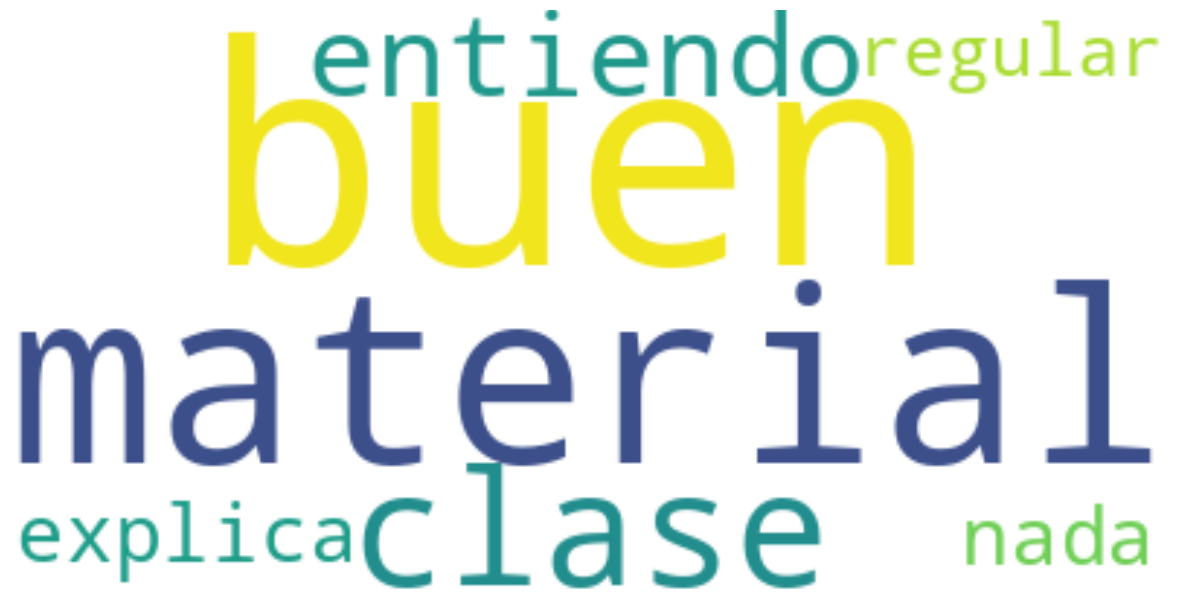

In [ ]:
#Nube de palabras: datos de despliegue

from wordcloud import WordCloud


lista_palabras = data["sin_stopwords"].tolist()
tokens = [keyword.strip() for sublista in lista_palabras for keyword in sublista]
texto= ' '.join(tokens)
wc = WordCloud(background_color="white", max_words=1000, margin=0)
wc.generate(texto)
wc.to_file("nube1.png")
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#Representación en vector de características

# Se representan los comentarios con el mismo diccionario de datos utilizado en para el aprendizaje del modelo
vectors = []
for text in data['stemming']:
    if len(text)==0:
      text_vector= np.zeros(word2vec_model.vector_size)
    else:
      text_vector=np.mean([word2vec_model.wv[word] for word in text if word in word2vec_model.wv], axis=0)
      #text_vector=np.mean([word2vec_model.wv[word] for word in text if word in word2vec_model.wv] or [0], axis=0)

    vectors.append(text_vector)

# Crear un DataFrame a partir de los vectores
data_word2vec = pd.DataFrame(vectors)
data_word2vec

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.004577,0.004292,0.003204,0.007011,-0.003977,-0.007003,0.002545,0.007957,-0.004950,-0.003937,...,0.003346,-0.001455,-0.002873,0.002060,0.008517,-0.000255,-0.008323,-0.005038,-0.002030,0.002060
1,-0.003943,0.000033,-0.006279,-0.004492,0.003533,0.001730,-0.002416,-0.000785,-0.000890,0.004014,...,0.002675,0.000964,0.008050,-0.006049,0.003069,0.001433,0.003568,0.001168,0.000637,-0.003213
2,0.005121,-0.004418,-0.009191,-0.009063,0.006234,-0.005235,0.005253,-0.001578,0.009701,0.007163,...,-0.009411,-0.004752,-0.003160,0.000486,-0.000697,-0.007876,-0.003787,-0.002742,-0.006385,-0.006378


In [ ]:
data['stemming']

,stemming
0,"[buen, material, clas]"
1,"[entiend, explic, nad]"
2,[regul]


In [ ]:
#Hacemos la predicción
Y_pred = model.predict(data_word2vec)
data['prediccion']=labelencoder.inverse_transform(Y_pred)
data

,comentario,sentimiento,tokens,sin_stopwords,stemming,prediccion
0,el profesor 3 tiene un buen material de clase,NaN,"[el, profesor, tiene, un, buen, material, de, ...","[buen, material, clase]","[buen, material, clas]",positivo
1,no le entiendo no explica nada,NaN,"[no, le, entiendo, no, explica, nada]","[entiendo, explica, nada]","[entiend, explic, nad]",negativo
2,muy regular,NaN,"[muy, regular]",[regular],[regul],negativo
